In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.sql.types import StringType, IntegerType

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
dataset = spark.read.csv("Dataset.csv", header=True, inferSchema=True)

In [4]:
dataset.show()

+---+--------------------+--------+----------+-----+-------------+
| id|         sugar_level|calories|    weight|  fat|   food_color|
+---+--------------------+--------+----------+-----+-------------+
|  1|145.7699999999999...| 764 cal|1745.73 gr|46 gr| Lemon Yellow|
|  2|-4.60000000000000...| 262 cal|1903.09 gr|24 gr|    Navy Blue|
|  3|            95.81 gr| 448 cal|1539.14 gr|27 gr|Sunset Yellow|
|  4|           100.16 gr| 375 cal| 746.22 gr|11 gr|Sunset Yellow|
|  5|-8.56000000000000...|  93 cal| 134.08 gr|26 gr|   Sunset Red|
|  6|           140.24 gr| 651 cal|1989.74 gr|24 gr|       Purple|
|  7|35.26000000000000...| 331 cal|1994.42 gr|32 gr|    Navy Blue|
|  8|            35.47 gr| 245 cal| 438.82 gr|28 gr|        Green|
|  9|59.76000000000000...| 771 cal|  31.05 gr|24 gr|       Coffee|
| 10|-7.60999999999999...|  99 cal|  157.4 gr| 4 gr|       Purple|
| 11|96.58000000000001 gr| 506 cal|  169.6 gr|26 gr|Sunset Yellow|
| 12|5.180000000000007 gr| 459 cal| 169.26 gr|19 gr|   Sunset 

In [5]:
df_train = dataset.select("sugar_level", "calories", "weight", "fat", "food_color")

In [6]:
df_train.show()

+--------------------+--------+----------+-----+-------------+
|         sugar_level|calories|    weight|  fat|   food_color|
+--------------------+--------+----------+-----+-------------+
|145.7699999999999...| 764 cal|1745.73 gr|46 gr| Lemon Yellow|
|-4.60000000000000...| 262 cal|1903.09 gr|24 gr|    Navy Blue|
|            95.81 gr| 448 cal|1539.14 gr|27 gr|Sunset Yellow|
|           100.16 gr| 375 cal| 746.22 gr|11 gr|Sunset Yellow|
|-8.56000000000000...|  93 cal| 134.08 gr|26 gr|   Sunset Red|
|           140.24 gr| 651 cal|1989.74 gr|24 gr|       Purple|
|35.26000000000000...| 331 cal|1994.42 gr|32 gr|    Navy Blue|
|            35.47 gr| 245 cal| 438.82 gr|28 gr|        Green|
|59.76000000000000...| 771 cal|  31.05 gr|24 gr|       Coffee|
|-7.60999999999999...|  99 cal|  157.4 gr| 4 gr|       Purple|
|96.58000000000001 gr| 506 cal|  169.6 gr|26 gr|Sunset Yellow|
|5.180000000000007 gr| 459 cal| 169.26 gr|19 gr|   Sunset Red|
|100.4199999999999...| 346 cal|1296.55 gr|15 gr|       

In [7]:
df_train = df_train.dropna()

In [8]:
df_train = df_train.withColumn("food_color", 
                               when(df_train["food_color"] == "Black", 0).
                               when(df_train["food_color"] == "Coffee", 1).
                               when(df_train["food_color"] == "Grass Green", 2).
                               when(df_train["food_color"] == "Green", 3).
                               when(df_train["food_color"] == "Lemon Yellow", 4).
                               when(df_train["food_color"] == "Navy Blue", 5).
                               when(df_train["food_color"] == "Purple", 6).
                               when(df_train["food_color"] == "Rose", 7).
                               when(df_train["food_color"] == "Sunset Red", 8).
                               when(df_train["food_color"] == "Sunset Yellow", 9)
                              )

In [9]:
df_train = df_train.withColumn("calories", regexp_replace("calories", "cal", ""))
df_train = df_train.withColumn("sugar_level", regexp_replace("sugar_level", "gr", ""))
df_train = df_train.withColumn("weight", regexp_replace("weight", "gr", ""))
df_train = df_train.withColumn("fat", regexp_replace("fat", "gr", ""))

In [10]:
df_train.show()

+--------------------+--------+--------+---+----------+
|         sugar_level|calories|  weight|fat|food_color|
+--------------------+--------+--------+---+----------+
| 145.76999999999998 |    764 |1745.73 |46 |         4|
|-4.6000000000000085 |    262 |1903.09 |24 |         5|
|              95.81 |    448 |1539.14 |27 |         9|
|             100.16 |    375 | 746.22 |11 |         9|
| -8.560000000000002 |     93 | 134.08 |26 |         8|
|             140.24 |    651 |1989.74 |24 |         6|
| 35.260000000000005 |    331 |1994.42 |32 |         5|
|              35.47 |    245 | 438.82 |28 |         3|
| 59.760000000000005 |    771 |  31.05 |24 |         1|
| -7.609999999999999 |     99 |  157.4 | 4 |         6|
|  96.58000000000001 |    506 |  169.6 |26 |         9|
|  5.180000000000007 |    459 | 169.26 |19 |         8|
| 100.41999999999999 |    346 |1296.55 |15 |         0|
| 116.78999999999999 |    436 |  539.3 |36 |         9|
|              86.53 |    312 |1122.68 |38 |    

In [11]:
df_train = df_train.withColumn("calories", regexp_replace("calories", " ", ""))
df_train = df_train.withColumn("sugar_level", regexp_replace("sugar_level", " ", ""))
df_train = df_train.withColumn("weight", regexp_replace("weight", " ", ""))
df_train = df_train.withColumn("fat", regexp_replace("fat", " ", ""))

In [12]:
df_train.show()

+-------------------+--------+-------+---+----------+
|        sugar_level|calories| weight|fat|food_color|
+-------------------+--------+-------+---+----------+
| 145.76999999999998|     764|1745.73| 46|         4|
|-4.6000000000000085|     262|1903.09| 24|         5|
|              95.81|     448|1539.14| 27|         9|
|             100.16|     375| 746.22| 11|         9|
| -8.560000000000002|      93| 134.08| 26|         8|
|             140.24|     651|1989.74| 24|         6|
| 35.260000000000005|     331|1994.42| 32|         5|
|              35.47|     245| 438.82| 28|         3|
| 59.760000000000005|     771|  31.05| 24|         1|
| -7.609999999999999|      99|  157.4|  4|         6|
|  96.58000000000001|     506|  169.6| 26|         9|
|  5.180000000000007|     459| 169.26| 19|         8|
| 100.41999999999999|     346|1296.55| 15|         0|
| 116.78999999999999|     436|  539.3| 36|         9|
|              86.53|     312|1122.68| 38|         3|
|             142.05|     43

In [16]:
df_train = df_train.withColumn("calories", df_train["calories"].cast(IntegerType()))
df_train = df_train.withColumn("sugar_level", df_train["sugar_level"].cast(IntegerType()))
df_train = df_train.withColumn("weight", df_train["weight"].cast(IntegerType()))
df_train = df_train.withColumn("fat", df_train["fat"].cast(IntegerType()))

In [17]:
df_train.show()

+-----------+--------+------+---+----------+
|sugar_level|calories|weight|fat|food_color|
+-----------+--------+------+---+----------+
|        145|     764|  1745| 46|         4|
|         -4|     262|  1903| 24|         5|
|         95|     448|  1539| 27|         9|
|        100|     375|   746| 11|         9|
|         -8|      93|   134| 26|         8|
|        140|     651|  1989| 24|         6|
|         35|     331|  1994| 32|         5|
|         35|     245|   438| 28|         3|
|         59|     771|    31| 24|         1|
|         -7|      99|   157|  4|         6|
|         96|     506|   169| 26|         9|
|          5|     459|   169| 19|         8|
|        100|     346|  1296| 15|         0|
|        116|     436|   539| 36|         9|
|         86|     312|  1122| 38|         3|
|        142|     430|   228| 36|         4|
|         97|     262|   245| 31|         7|
|        150|     384|  1414| 19|         4|
|        137|     679|  1127| 44|         3|
|         

In [18]:
df_train.dtypes

[('sugar_level', 'int'),
 ('calories', 'int'),
 ('weight', 'int'),
 ('fat', 'int'),
 ('food_color', 'int')]

In [20]:
cols = df_train.columns

df_train = VectorAssembler(inputCols=cols, outputCol="FeaturesVector").transform(df_train)

In [21]:
df_train.show()

+-----------+--------+------+---+----------+--------------------+
|sugar_level|calories|weight|fat|food_color|      FeaturesVector|
+-----------+--------+------+---+----------+--------------------+
|        145|     764|  1745| 46|         4|[145.0,764.0,1745...|
|         -4|     262|  1903| 24|         5|[-4.0,262.0,1903....|
|         95|     448|  1539| 27|         9|[95.0,448.0,1539....|
|        100|     375|   746| 11|         9|[100.0,375.0,746....|
|         -8|      93|   134| 26|         8|[-8.0,93.0,134.0,...|
|        140|     651|  1989| 24|         6|[140.0,651.0,1989...|
|         35|     331|  1994| 32|         5|[35.0,331.0,1994....|
|         35|     245|   438| 28|         3|[35.0,245.0,438.0...|
|         59|     771|    31| 24|         1|[59.0,771.0,31.0,...|
|         -7|      99|   157|  4|         6|[-7.0,99.0,157.0,...|
|         96|     506|   169| 26|         9|[96.0,506.0,169.0...|
|          5|     459|   169| 19|         8|[5.0,459.0,169.0,...|
|        1

In [22]:
df_train = StandardScaler(inputCol="FeaturesVector", outputCol="features").fit(df_train).transform(df_train)

In [23]:
df_train.show()

+-----------+--------+------+---+----------+--------------------+--------------------+
|sugar_level|calories|weight|fat|food_color|      FeaturesVector|            features|
+-----------+--------+------+---+----------+--------------------+--------------------+
|        145|     764|  1745| 46|         4|[145.0,764.0,1745...|[3.07522237130499...|
|         -4|     262|  1903| 24|         5|[-4.0,262.0,1903....|[-0.0848337205877...|
|         95|     448|  1539| 27|         9|[95.0,448.0,1539....|[2.01480086395844...|
|        100|     375|   746| 11|         9|[100.0,375.0,746....|[2.12084301469309...|
|         -8|      93|   134| 26|         8|[-8.0,93.0,134.0,...|[-0.1696674411754...|
|        140|     651|  1989| 24|         6|[140.0,651.0,1989...|[2.96918022057033...|
|         35|     331|  1994| 32|         5|[35.0,331.0,1994....|[0.74229505514258...|
|         35|     245|   438| 28|         3|[35.0,245.0,438.0...|[0.74229505514258...|
|         59|     771|    31| 24|         1

In [24]:
kmeans = KMeans().setK(2)
model = kmeans.fit(df_train).transform(df_train)

In [25]:
model.show()

+-----------+--------+------+---+----------+--------------------+--------------------+----------+
|sugar_level|calories|weight|fat|food_color|      FeaturesVector|            features|prediction|
+-----------+--------+------+---+----------+--------------------+--------------------+----------+
|        145|     764|  1745| 46|         4|[145.0,764.0,1745...|[3.07522237130499...|         0|
|         -4|     262|  1903| 24|         5|[-4.0,262.0,1903....|[-0.0848337205877...|         1|
|         95|     448|  1539| 27|         9|[95.0,448.0,1539....|[2.01480086395844...|         0|
|        100|     375|   746| 11|         9|[100.0,375.0,746....|[2.12084301469309...|         1|
|         -8|      93|   134| 26|         8|[-8.0,93.0,134.0,...|[-0.1696674411754...|         1|
|        140|     651|  1989| 24|         6|[140.0,651.0,1989...|[2.96918022057033...|         0|
|         35|     331|  1994| 32|         5|[35.0,331.0,1994....|[0.74229505514258...|         1|
|         35|     24

In [26]:
import matplotlib.pyplot as plt

In [27]:
pandas = model.toPandas()

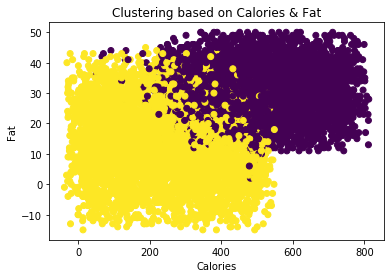

In [36]:
plt.title("Clustering based on Calories & Fat")
plt.scatter(pandas["calories"], pandas["fat"], c=pandas["prediction"])
plt.xlabel("Calories")
plt.ylabel("Fat")
plt.show()